In [4]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
import re

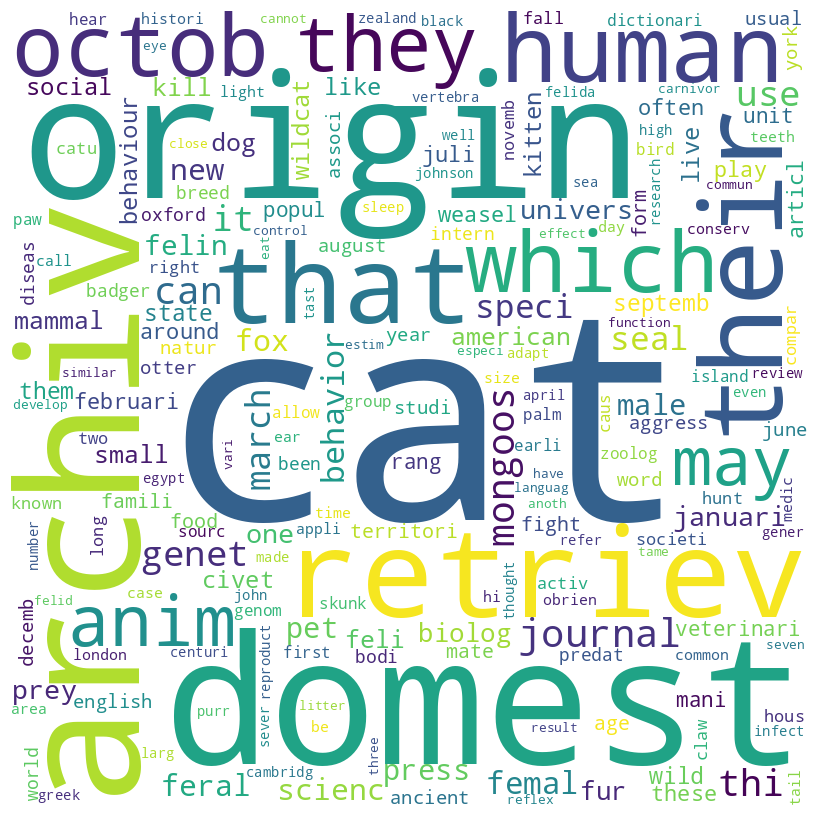

CPU times: user 2.69 s, sys: 281 ms, total: 2.97 s
Wall time: 2.99 s


In [5]:
#my code

%%time

# Wikipedia 페이지의 정보를 추출하는 함수
def get_info_from_wiki(word, mode='full'):

    # Wikipedia API를 호출하기 위한 기본 설정
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    PARAMS = {
        "action": "parse",
        "page": word,
        "format": "json",
        "prop": "text",
        "utf8": 1,
        "formatversion": 2
    }

    # Wikipedia API 호출
    response = S.get(url=URL, params=PARAMS)
    data = response.json()
    html_content = data['parse']['text']

    # BeautifulSoup를 사용하여 HTML 파싱
    soup = BeautifulSoup(html_content, "html.parser")

    # 텍스트만 추출
    full_txt = soup.getText()

    # 전체 모드일 경우
    if mode == 'full':
        # 텍스트를 단어 단위로 분리
        words = full_txt.split('\n')
        words = ''.join(words)
        words = words.split(' ')

        # 유효한 단어만 선택
        li = select_valid_words(words)
        return li
    else:
        # 이외의 모드에서는 기본 정보와 상세 정보를 분리하여 반환
        basic_info, detailed_info = split_info(full_txt)
        return basic_info, detailed_info

# 유효한 단어만 선택하는 함수
def select_valid_words(words):
    # 잘못된 문자와 불용어 리스트
    bad_list = [str(i) for i in range(10)]  # '0'부터 '9'까지의 문자열로 이루어진 리스트
    bad_list.extend(['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '[', ']'])  # 특수문자 리스트
    stopwords = ['a', 'an', 'the', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 'in', 'out', 'by', 'of', 'for', 'with', 'at', 'from', 'into', 'during', 'including', 'between', 'on', 'to', 'as', 'also', 'has', 'had', 'have', 'do', 'does', 'did', 'not', 'because', 'since', 'until', 'while', 'about', 'against', 'among', 'through', 'during', 'before', 'after', 'above', 'below', 'up', 'down', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very']

    li = []
    for dword in words:
        word = dword.replace(',', '').replace('.', '').replace(';', '').replace(':', '').replace('"', '').replace("'", '').replace("?", '').lower()
        if 3 <= len(word) <= 20 and (word not in stopwords):
            check = 0
            for bad_char in bad_list:
                if bad_char in word:
                    check += 1
            if check == 0:
                li.append(word)
    return li

# 정보를 기본 정보와 상세 정보로 분리하는 함수
def split_info(full_txt):
    # 앞부분 날려버리기
    cut_list = ['Notes[edit]', "References[edit]"]
    for cut in cut_list:
        full_txt = full_txt.split(cut, 1)[0]

    # 문단을 기준으로 다시 SPLIT
    split_by_section = full_txt.split('\n\n\n')
    basic_info = split_by_section[-3]
    detailed_info = split_by_section[-2]
    return basic_info, detailed_info

# 단어 리스트
word = 'cat'
words = get_info_from_wiki(word, mode='full')

# 각 단어의 빈도 계산
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in words]
word_freq = Counter(stemmed_words)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=800, background_color='white')

# WordCloud 생성
wordcloud.generate_from_frequencies(word_freq)

# WordCloud 이미지 표시
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


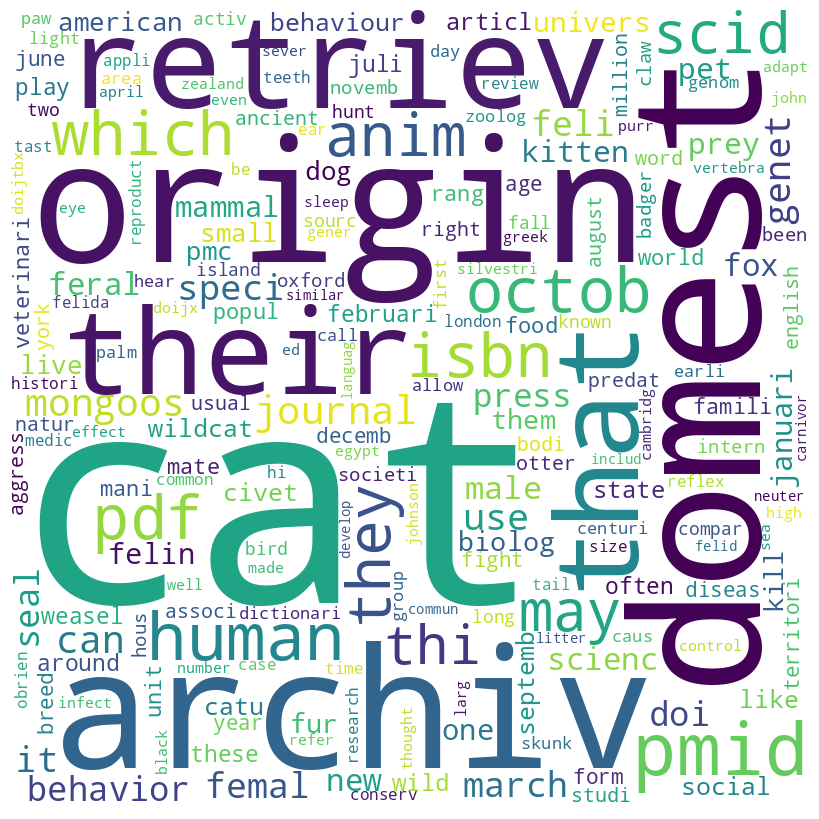

CPU times: user 2.86 s, sys: 221 ms, total: 3.08 s
Wall time: 3.24 s


In [7]:
#gpt's optimized code

%%time

def get_info_from_wiki(word, mode='full'):
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    PARAMS = {
        "action": "parse",
        "page": word,
        "format": "json",
        "prop": "text",
        "utf8": 1,
        "formatversion": 2
    }

    response = S.get(url=URL, params=PARAMS)
    data = response.json()
    html_content = data['parse']['text']

    soup = BeautifulSoup(html_content, "html.parser")
    full_txt = soup.getText()

    if mode == 'full':
        words = full_txt.split('\n')
        words = ''.join(words)
        words = words.split(' ')
        li = select_valid_words(words)
        return li
    else:
        basic_info, detailed_info = split_info(full_txt)
        return basic_info, detailed_info

def select_valid_words(words):
    stopwords = ['a', 'an', 'the', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 'in', 'out', 'by', 'of', 'for', 'with', 'at', 'from', 'into', 'during', 'including', 'between', 'on', 'to', 'as', 'also', 'has', 'had', 'have', 'do', 'does', 'did', 'not', 'because', 'since', 'until', 'while', 'about', 'against', 'among', 'through', 'during', 'before', 'after', 'above', 'below', 'up', 'down', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very']
    stopwords = set(stopwords)  # Convert to a set for faster lookup

    # Use a regular expression to remove special characters and numbers
    words = [re.sub(r'\W|\d', '', word).lower() for word in words]

    li = [word for word in words if 3 <= len(word) <= 20 and word not in stopwords]
    return li

def split_info(full_txt):
    cut_list = ['Notes[edit]', "References[edit]"]
    for cut in cut_list:
        full_txt = full_txt.split(cut, 1)[0]

    split_by_section = full_txt.split('\n\n\n')
    basic_info = split_by_section[-3]
    detailed_info = split_by_section[-2]
    return basic_info, detailed_info

word = 'cat'
words = get_info_from_wiki(word, mode='full')

ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in words]
word_freq = Counter(stemmed_words)

wordcloud = WordCloud(width=800, height=800, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

